In the previous notebook, we have ran pose estimation on the trial videos (OpenPose), and triangulated the coordinates to get 3D coordinates for each trial (pose2sim). Furthermore, we have performed inverse kinematics and dynamics to extract joint angles and moments.

In this script, we will clean the data, and extract further information (such as speed, acceleration, etc.). 


In [1]:
#| code-fold: true
#| code-summary: Code to load packages and prepare the environment


# packages
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy


curfolder = os.getcwd()
print(curfolder)

# files to work with
MTfolder = 'C:\\Users\\kadava\\Documents\\Github\\FLESH_3Dtracking_new\\projectdata\\' ## FLAGGED CHANGE
BBfolder = curfolder + '\\..\\01_XDF_processing\\data\\Data_processed\\Data_trials\\'

# folders to save the processed data
MTfolder_processed = curfolder + '\\TS_motiontracking\\'

E:\FLESH_ContinuousBodilyEffort\03_TS_processing


## Motion tracking - kinematics


In [2]:
#| code-fold: true
#| code-summary: Code to prepare files to process

MTtotrack = glob.glob(MTfolder + '*/P*/*', recursive=True)

# get rid of all the folders that are not the ones we want to track, like .sto files
MTtotrack = [x for x in MTtotrack if 'sto' not in x]
MTtotrack = [x for x in MTtotrack if 'txt' not in x]
MTtotrack = [x for x in MTtotrack if 'xml' not in x]
MTtotrack = [x for x in MTtotrack if 'opensim' not in x]
MTtotrack = [x for x in MTtotrack if 'Results' not in x]
MTtotrack = [x for x in MTtotrack if 'toml' not in x]

print(MTtotrack)

MTfiles_all = []

for folder in MTtotrack:
    print('working on:' + folder)
    # last element is trialid
    trialid = folder.split('\\')[-1]
    
    # get all csv files in the folder
    csvfiles = glob.glob(folder + '\\**\\*.csv', recursive=True)
    # keep only the ones that have butterworth in the name
    csvfiles = [x for x in csvfiles if 'butterworth' in x]
    butterfile = csvfiles[0]
    # append to list with trialid
    MTfiles_all.append([trialid, butterfile])

['C:\\Users\\kadava\\Documents\\Github\\FLESH_3Dtracking_new\\projectdata\\Session_0_1\\P0\\0_1_0_p0', 'C:\\Users\\kadava\\Documents\\Github\\FLESH_3Dtracking_new\\projectdata\\Session_0_1\\P0\\0_1_18_p0', 'C:\\Users\\kadava\\Documents\\Github\\FLESH_3Dtracking_new\\projectdata\\Session_0_1\\P0\\0_1_19_p0', 'C:\\Users\\kadava\\Documents\\Github\\FLESH_3Dtracking_new\\projectdata\\Session_0_1\\P0\\0_1_1_p0', 'C:\\Users\\kadava\\Documents\\Github\\FLESH_3Dtracking_new\\projectdata\\Session_0_1\\P0\\0_1_20_p0', 'C:\\Users\\kadava\\Documents\\Github\\FLESH_3Dtracking_new\\projectdata\\Session_0_1\\P0\\0_1_21_p0', 'C:\\Users\\kadava\\Documents\\Github\\FLESH_3Dtracking_new\\projectdata\\Session_0_1\\P0\\0_1_22_p0', 'C:\\Users\\kadava\\Documents\\Github\\FLESH_3Dtracking_new\\projectdata\\Session_0_1\\P0\\0_1_23_p0', 'C:\\Users\\kadava\\Documents\\Github\\FLESH_3Dtracking_new\\projectdata\\Session_0_1\\P0\\0_1_24_p0', 'C:\\Users\\kadava\\Documents\\Github\\FLESH_3Dtracking_new\\projectdata\\

working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_13_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_14_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_15_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_16_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_17_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_27_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_28_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_29_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_30_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Sessi

working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_52_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_53_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_9_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_tpose_1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_0_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_10_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_11_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_12_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_13_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Sessi

working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_68_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_69_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_6_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_70_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_71_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_72_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_73_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_74_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_75_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Sessio

working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_85_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_86_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_87_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_88_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_89_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_8_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_90_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_91_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_9_p0
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session

working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_33_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_34_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_35_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_36_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_37_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_53_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_54_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_55_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_56_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Sessi

working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_63_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_64_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_65_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_92_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_93_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_94_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_95_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_96_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_97_p1
working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Sessi

The data can still be noisy, as the OpenPose in-built filter is not particularly strong. We don't want to smooth all the keypoints with the same strength, as some keypoints are more prone to noise than others. We can therefore use the function `check_smooth_strength` to check the effect of different smoothing strengths on the data. 


In [3]:
#| code-fold: true
#| code-summary: Code with function to check smoothing strength

# function to check different smoothing windows and orders
def check_smooth_strength(df, keycols, windows, orders, keytoplot):

    # prepare new df
    df_smooth = pd.DataFrame()

    for col in keycols:
        for win in windows:
            for ord in orders:
                df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(df[col], win, ord)

    # make R_Hand_x from df_sample a list
    keycol_x = df[keycols[0]].tolist()
    keycol_y = df[keycols[1]].tolist()
    keycol_z = df[keycols[2]].tolist()

    # load these values into df_smooth as a new column
    df_smooth[keycols[0]] = keycol_x
    df_smooth[keycols[1]] = keycol_y
    df_smooth[keycols[2]] = keycol_z

    # plot keytoplot in all strngths
    colstoplot = [x for x in df_smooth.columns if keytoplot in x]
    plt.figure()
    for col in colstoplot:
        plt.plot(df_smooth[col], label=col)
    plt.legend()
    plt.show()

C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_43_p0\pose-3d\0_1_43_p0_0-253_filt_butterworth.trc.csv


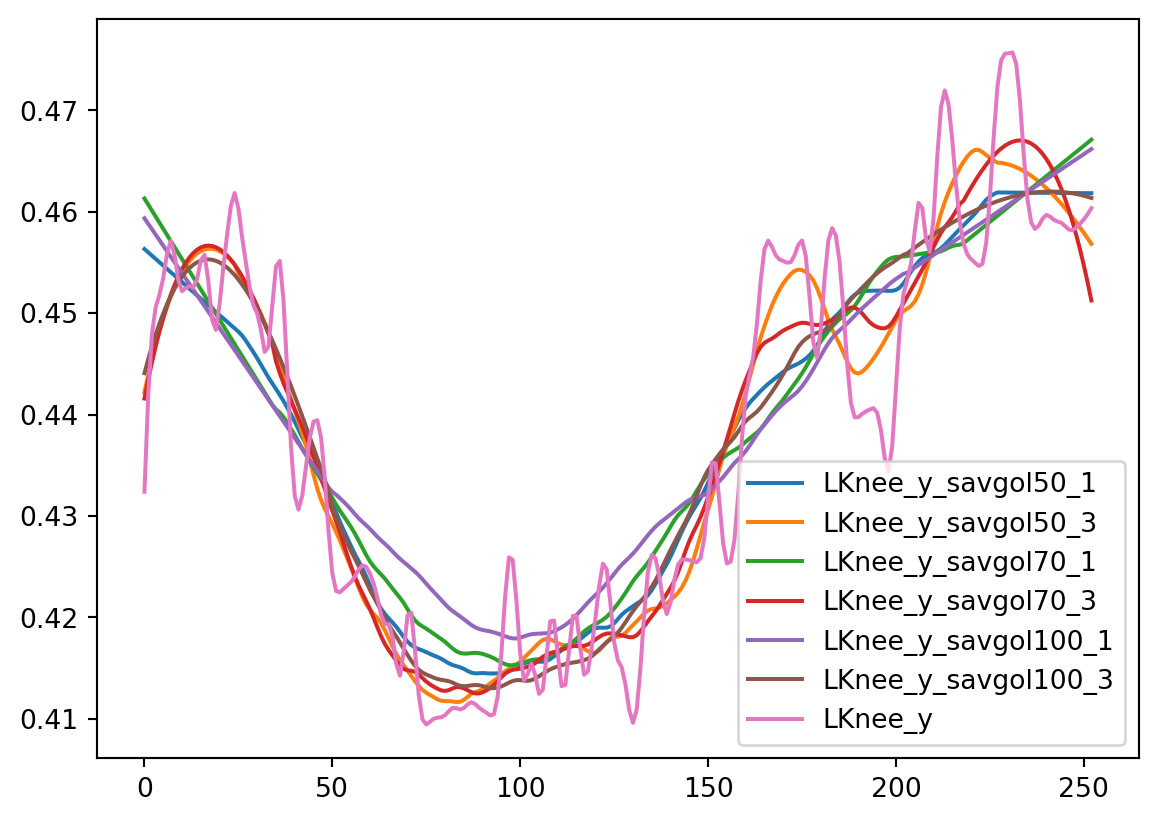

In [4]:
#| code-fold: true
#| code-summary: Code to plot

print(MTfiles_all[20][1])
sample = pd.read_csv(MTfiles_all[20][1], sep=',')

windows = [50,70,100] # list possible window
orders = [1,3] # list possible orders

# col of interest
samplecol = ['LKnee_x', 'LKnee_y', 'LKnee_z']

check_smooth_strength(sample, samplecol, windows, orders, 'LKnee_y')

We used OpenPose (XX) for pose estimation, and pose2sim (XX) for triangulation.

Here we clean the data, and smooth coordinates and derivatives with a Savitzky-Golay filter. We vary the strength (i.e., window and order) according to which keypoint we are smoothing (e.g., lower versus upper body)

To get aggregated kinematic measures for each body group (i.e., head, upperbody, arms, lowerbody), we compute euclidian sum on each derivative belonging to the group.


In [5]:
#| code-fold: true
#| code-summary: Code with functions for processing kinematic data

# function to get euclidian sum of associated keypoints

def aggregate_keypoints(df, measurement, finalcolname, use):

    if use == 'kinematics':
        # group keypoints that belong together
        lowerbodycols = ['RHip', 'LHip']
        legcols = ['RKnee', 'RAnkle', 'LAnkle', 'LKnee', 'RHeel', 'LHeel']
        headcols = ['Head', 'Neck', 'Nose']
        armcols = ['RShoulder', 'RElbow', 'RWrist', 'LShoulder', 'LElbow', 'LWrist', 'RIndex', 'LIndex']

        groups = [lowerbodycols, legcols, headcols, armcols]

    elif use == 'angles':
        pelviscols = ['pelvis']
        spinecols = ['L5_S1', 'L4_L5', 'L3_L4', 'L2_L3', 'L1_L2', 'L1_T12']
        lowerbodycols = ['pelvis', 'hip']
        legcols = ['knee', 'ankle', 'subtalar']
        headcols = ['neck']
        armcols = ['arm', 'elbow', 'wrist', 'pro_sup']

        groups = [lowerbodycols, legcols, headcols, armcols, pelviscols, spinecols]

    # make subdf only with speed
    subdf = df[[x for x in df.columns if measurement in x]]

    # loop through each joint group
    for group in groups:
        # get cols
        cols = [x for x in subdf.columns if any(y in x for y in group)]
        subdf_temp = subdf[cols]

        for index, row in subdf_temp.iterrows():
            # get all values of that row
            values = row.values
            # calculate euclidian sum
            euclidian_sum = np.sqrt(np.sum(np.square(values))) ## FLAGGED: possibly normalize
            # get a name for new col
            if group == lowerbodycols:
                colname = 'lowerbody'
            elif group == legcols:
                colname = 'leg'
            elif group == headcols:
                colname = 'head'
            elif group == armcols:
                colname = 'arm'
            elif group == pelviscols:
                colname = 'pelvis'
            elif group == spinecols:
                colname = 'spine'
                

            df.loc[index, colname + finalcolname] = euclidian_sum

    return df


# get kinematic derivatives
def get_derivatives(df, sr, upperbodycols, lowerbodycols, use):

    mtcols = df.columns
    if use == 'kinematics':
        # get rid of cols that are not x, y or z
        mtcols = [x for x in mtcols if '_x' in x or '_y' in x or '_z' in x]
    

        # prepare cols for speed
        cols = [x.split('_')[0] for x in mtcols]
        colsforspeed = list(set(cols))

        # for each unique colname (cols), calculate speed 
        for col in colsforspeed:
            # get x and y columns
            x = df[col + '_x']
            y = df[col + '_y']
            z = df[col + '_z'] # note that y and z are flipped
            # calculate speed
            speed = np.insert(np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2),0,0)
            # multiply the values by sr, because now we have values in m/(s/sr)
            speed = speed*sr

            # smooth
            if any(x in col for x in upperbodycols):
                speed = scipy.signal.savgol_filter(speed, 15, 1)
            elif any(x in col for x in lowerbodycols):
                speed = scipy.signal.savgol_filter(speed, 20, 1)
            else:
                speed = scipy.signal.savgol_filter(speed, 15, 1)

            # if the col contains wrist, we will alco calculate the vertical velocity (z dimension)
            if 'Wrist' in col:
                verticvel = np.insert(np.diff(z), 0, 0)
                verticvel = verticvel*sr
                verticvel = scipy.signal.savgol_filter(verticvel, 15, 1)

            # derive acceleration	
            acceleration = np.insert(np.diff(speed), 0, 0)
            acceleration = scipy.signal.savgol_filter(acceleration, 15, 1)

            # derive jerk
            jerk = np.insert(np.diff(acceleration), 0, 0)
            jerk = scipy.signal.savgol_filter(jerk, 15, 1)

            # new_data
            new_data = pd.DataFrame({col + '_speed': speed, col + '_acc': acceleration, col + '_jerk': jerk})
            df = pd.concat([df, new_data], axis=1)

    elif use == 'angles':
        # get rid of cols that are not angles (so skip time)
        mtcols = mtcols[1:]

        # derive speed
        for col in mtcols:
            speed = np.insert(np.diff(df[col]), 0, 0)
            speed = speed*sr
            speed = scipy.signal.savgol_filter(speed, 15, 1)

            # derive acceleration
            acceleration = np.insert(np.diff(speed), 0, 0)
            acceleration = scipy.signal.savgol_filter(acceleration, 15, 1)
            
            # derive jerk
            jerk = np.insert(np.diff(acceleration), 0, 0)
            jerk = scipy.signal.savgol_filter(jerk, 15, 1)

            # new_data
            new_data = pd.DataFrame({col + '_speed': speed, col + '_acc': acceleration, col + '_jerk': jerk})
            df = pd.concat([df, new_data], axis=1)

    return df

In [6]:
#| code-fold: false
#| code-summary: Code to process kinematics

# upper body cols
upperbodycols = ['Head', 'Neck', 'RShoulder', 'RElbow', 'RWrist', 'LShoulder', 'LElbow', 'LWrist', 'Nose', 'RIndex', 'LIndex']
# lower body cols
lowerbodycols = ['RHip', 'RKnee', 'RAnkle', 'RHeel' 'LHip', 'LKnee', 'LAnkle', 'LHeel']

for folder in MTtotrack:
    print('working on:' + folder)
    # last element is trialid
    trialid = folder.split('\\')[-1]
    
    # get all csv files in the folder
    csvfiles = glob.glob(folder + '/**/*.csv', recursive=True)
    # keep only the ones that have butterworth in the name
    csvfiles = [x for x in csvfiles if 'butterworth' in x]
    butterfile = csvfiles[0]

    # load it
    mt = pd.read_csv(butterfile)

    # the mt is missing 0 ms timepoint, so we need to create a row that copies the first row of mt and time = 0
    padrow = mt.iloc[0].copy()
    padrow['Time'] = 0

    # concatenate it to the beginning of mt 
    mt = pd.concat([pd.DataFrame(padrow).T, mt], ignore_index=True)

    # keep only cols of interest
    colstokeep = ["Time", "RHip", "RKnee", "RAnkle", "RHeel", "LHip", "LKnee", "LAnkle", "LHeel", "Neck", "Head", "Nose", "RShoulder", "RElbow", "RWrist", "RIndex", "LShoulder", "LElbow", "LWrist",
    "LIndex",
]
    mt = mt[[col for col in mt.columns if any(x in col for x in colstokeep)]]

        # if col has _y in it, replace it by _temp
    mt.columns = [x.replace('_y', '_temp') for x in mt.columns]
    # replace _z by _y
    mt.columns = [x.replace('_z', '_y') for x in mt.columns]
    # replace _temp by _z
    mt.columns = [x.replace('_temp', '_z') for x in mt.columns]

    # smooth all columns except time with savgol
    mtcols = mt.columns
    colstosmooth = mtcols[:-1]

    mt_smooth = pd.DataFrame()

    for col in colstosmooth:
        # if the col + x/y/z is in upperbodycols, smooth with 15,1
        if any(x in col for x in upperbodycols):
            mt_smooth[col] = scipy.signal.savgol_filter(mt[col], 15, 1)
        # as the lowerbody keypoints are not moving that much, they are much more prone to noise (e.g., from the measurement error of OpenPose, therefore we will smooth them with a little higher window)
        elif any(x in col for x in lowerbodycols):
            mt_smooth[col] = scipy.signal.savgol_filter(mt[col], 20, 1)
        else:
            mt_smooth[col] = scipy.signal.savgol_filter(mt[col], 15, 1)

        # and put them all to cms
        mt_smooth[col] = mt_smooth[col]*100

    # add back time column
    mt_smooth['Time'] = mt['Time']

    # get sampling rate
    sr = 1/np.mean(np.diff(mt['Time']))

    # get kinematic derivatives
    mt_smooth = get_derivatives(mt_smooth, sr, upperbodycols, lowerbodycols, 'kinematics')

    # getting aggreagated sums for groups of cols
    mt_smooth = aggregate_keypoints(mt_smooth, 'speed', '_speedKin_sum', 'kinematics')
    mt_smooth = aggregate_keypoints(mt_smooth, 'acc', '_accKin_sum', 'kinematics')
    mt_smooth = aggregate_keypoints(mt_smooth, 'jerk', '_jerkKin_sum', 'kinematics')

    # add trialid
    mt_smooth['TrialID'] = trialid
    # convert time to ms
    mt_smooth['Time'] = mt_smooth['Time']*1000
    # write to csv
    mt_smooth.to_csv(MTfolder_processed + '/mt_' + trialid + '.csv', index=False)

working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_0_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_18_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_19_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_1_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_20_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_21_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_22_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_23_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_24_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_25_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_26_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_2_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_36_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_37_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_38_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_39_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_3_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_40_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_41_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_42_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_43_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_44_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_4_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_5_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_6_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_7_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_8_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\0_1_tpose_0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_10_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_11_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_12_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_13_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_14_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_15_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_16_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_17_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_27_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_28_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_29_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_30_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_31_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_32_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_33_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_34_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_35_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_45_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_46_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_47_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_48_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_49_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_50_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_51_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_52_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_53_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_9_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\0_1_tpose_1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_0_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_10_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_11_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_12_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_13_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_14_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_15_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_16_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_17_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_18_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_1_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_2_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_38_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_39_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_3_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_40_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_41_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_42_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_43_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_44_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_45_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_46_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_47_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_48_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_49_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_4_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_50_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_51_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_52_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_5_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_67_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_68_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_69_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_6_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_70_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_71_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_72_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_73_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_74_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_75_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_76_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_77_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_78_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_79_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_7_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_80_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_81_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_82_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_83_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_84_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_85_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_86_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_87_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_88_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_89_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_8_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_90_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_91_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\0_2_9_p0


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_100_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_101_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_102_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_103_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_104_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_105_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_106_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_107_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_108_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_109_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_110_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_111_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_112_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_113_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_19_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_20_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_21_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_22_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_23_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_24_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_25_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_26_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_27_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_28_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_29_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_30_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_31_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_32_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_33_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_34_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_35_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_36_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_37_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_53_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_54_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_55_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_56_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_57_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_58_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_59_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_60_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_61_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_62_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_63_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_64_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_65_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_92_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_93_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_94_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_95_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_96_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_97_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_98_p1


working on:C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\0_2_99_p1


Let's check one file to see how the data looks like by plotting RWrist and its kinematics, and also the euclidian sum for the whole arm along with it


['E:\\FLESH_ContinuousBodilyEffort\\03_TS_processing\\TS_motiontracking\\mt_0_1_0_p0.csv', 'E:\\FLESH_ContinuousBodilyEffort\\03_TS_processing\\TS_motiontracking\\mt_0_1_18_p0.csv', 'E:\\FLESH_ContinuousBodilyEffort\\03_TS_processing\\TS_motiontracking\\mt_0_1_19_p0.csv', 'E:\\FLESH_ContinuousBodilyEffort\\03_TS_processing\\TS_motiontracking\\mt_0_1_1_p0.csv', 'E:\\FLESH_ContinuousBodilyEffort\\03_TS_processing\\TS_motiontracking\\mt_0_1_20_p0.csv', 'E:\\FLESH_ContinuousBodilyEffort\\03_TS_processing\\TS_motiontracking\\mt_0_1_21_p0.csv', 'E:\\FLESH_ContinuousBodilyEffort\\03_TS_processing\\TS_motiontracking\\mt_0_1_22_p0.csv', 'E:\\FLESH_ContinuousBodilyEffort\\03_TS_processing\\TS_motiontracking\\mt_0_1_23_p0.csv', 'E:\\FLESH_ContinuousBodilyEffort\\03_TS_processing\\TS_motiontracking\\mt_0_1_24_p0.csv', 'E:\\FLESH_ContinuousBodilyEffort\\03_TS_processing\\TS_motiontracking\\mt_0_1_25_p0.csv', 'E:\\FLESH_ContinuousBodilyEffort\\03_TS_processing\\TS_motiontracking\\mt_0_1_26_p0.csv', 

C:\Users\kadava\AppData\Local\Temp\ipykernel_23428\4069971435.py:49: UserWarning:

This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.



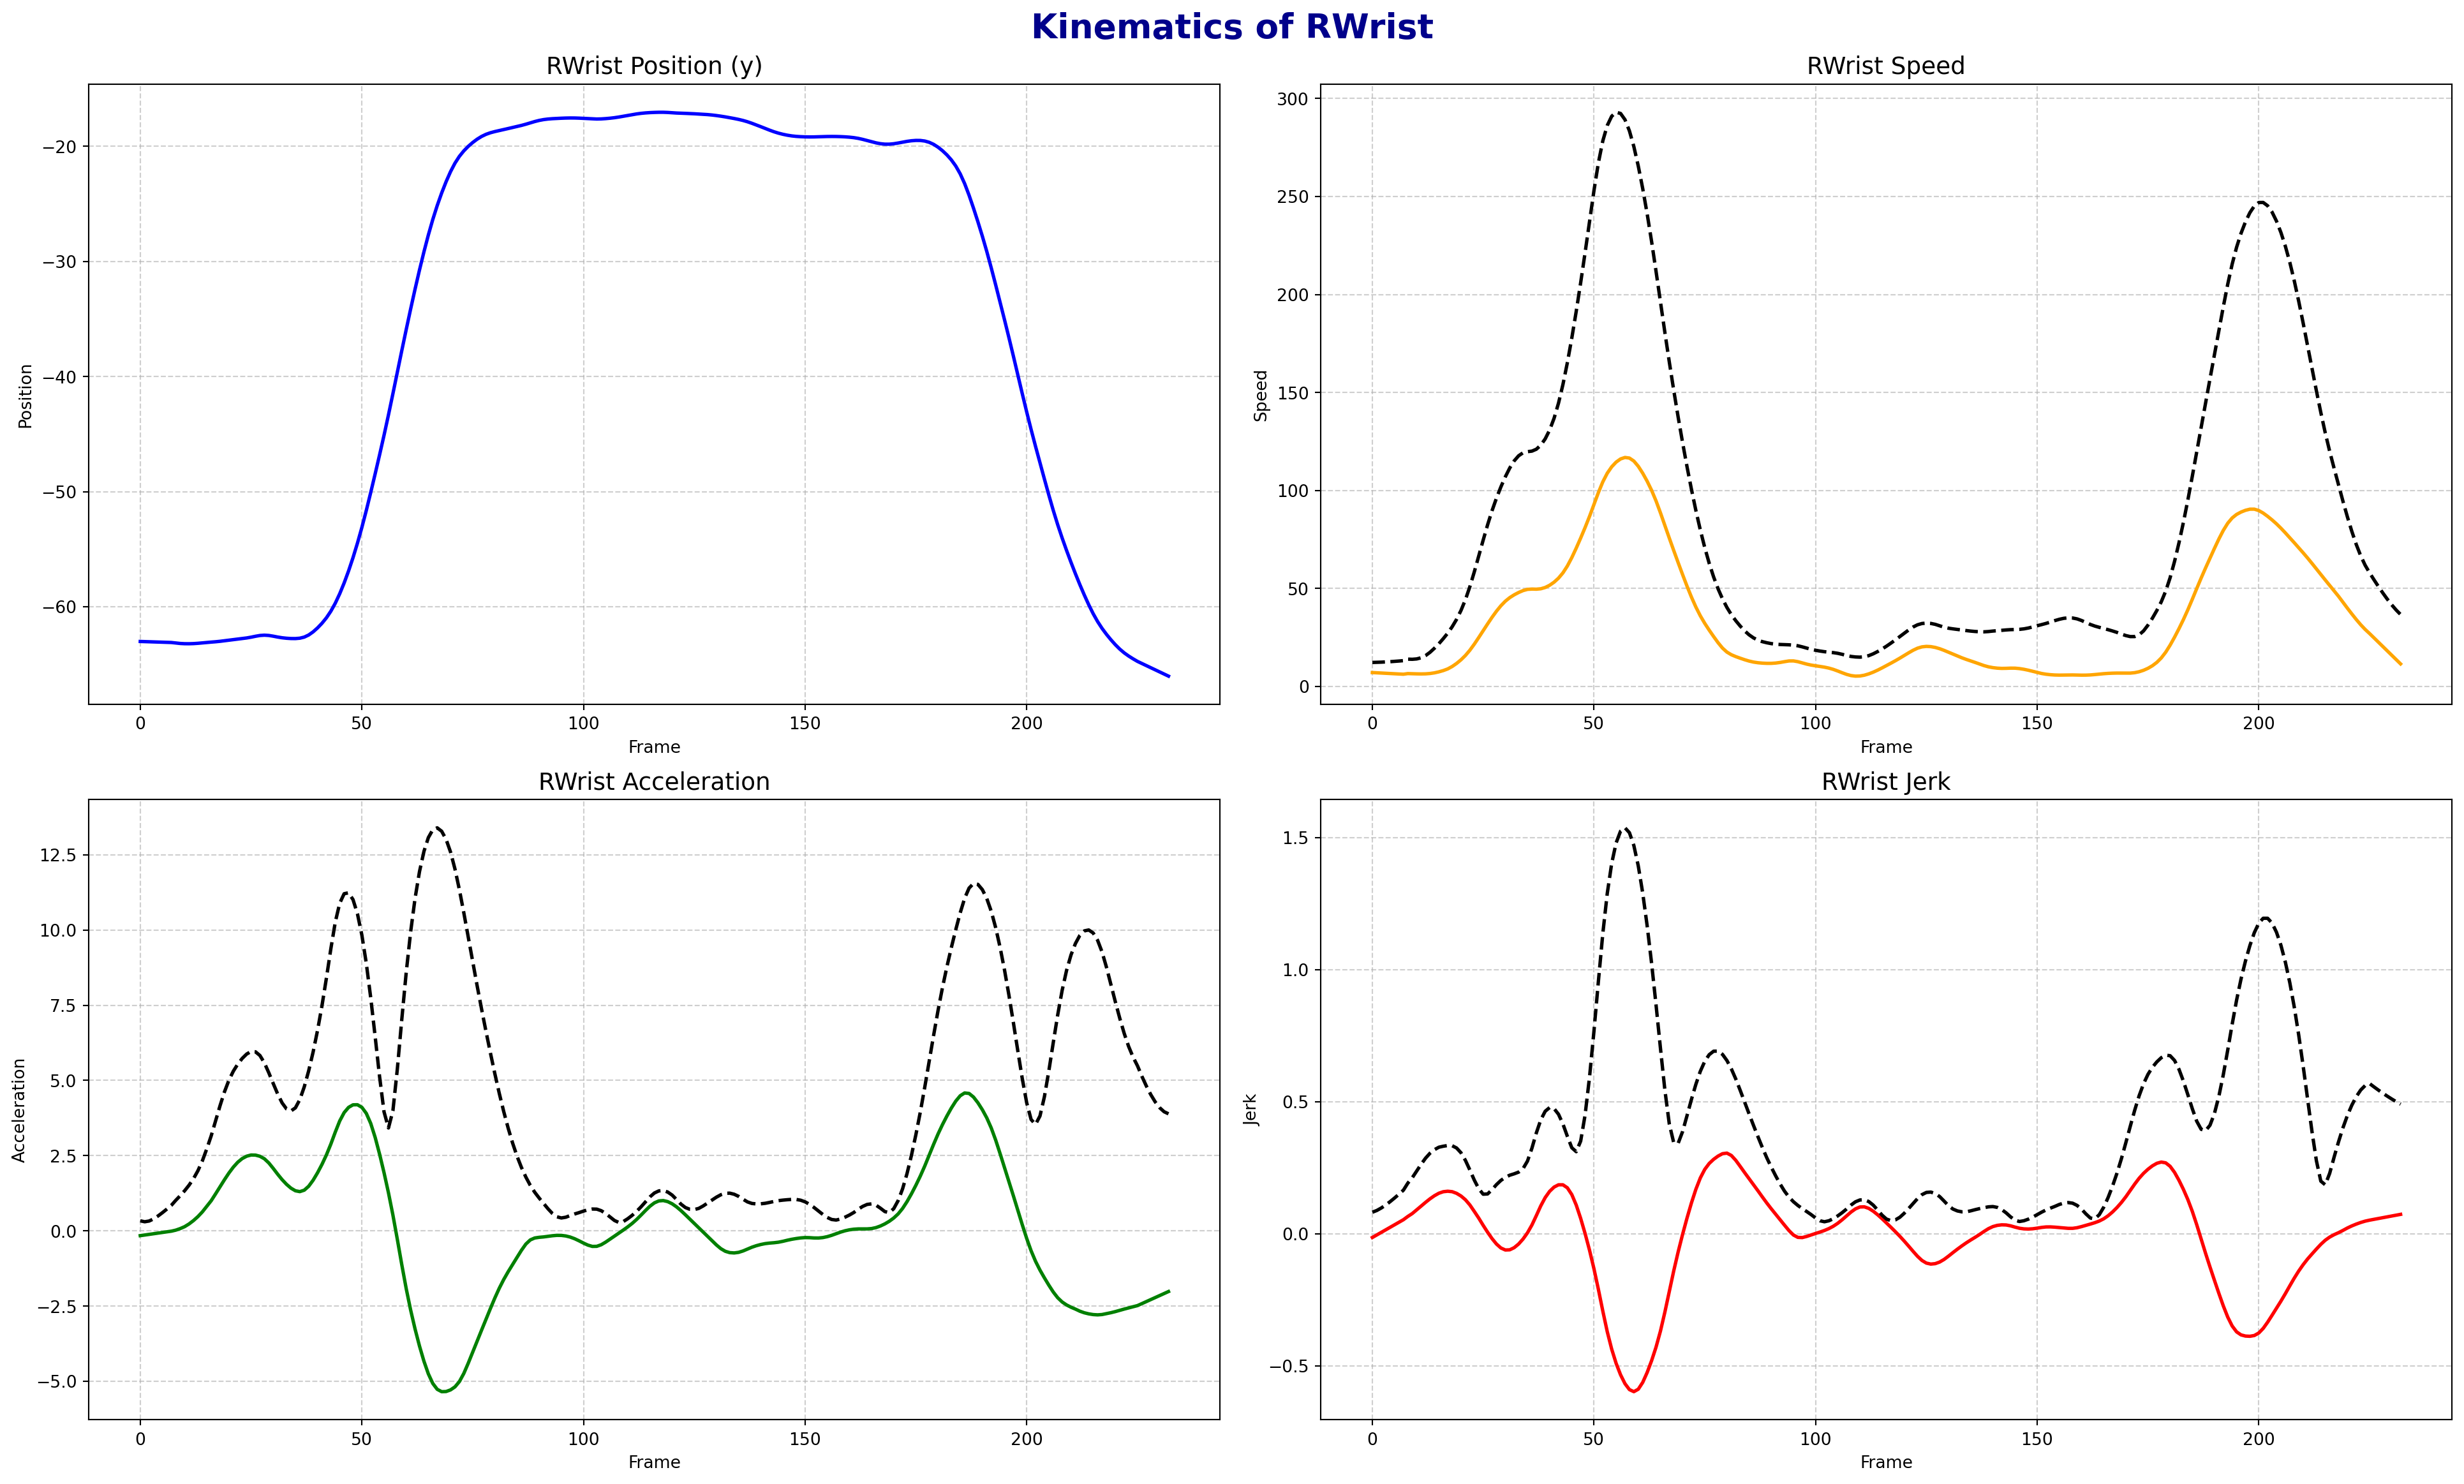

In [7]:
#| code-fold: true
#| code-summary: Show code for this plot

# Load one file to check
MTfiles = glob.glob(MTfolder_processed + '/*.csv')
print(MTfiles)
sample = pd.read_csv(MTfiles[4])

# Define colors and styles
colors = ['blue', 'orange', 'green', 'red']
titles = ['RWrist_y', 'RWrist_speed', 'RWrist_acc', 'RWrist_jerk']

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(20, 12), constrained_layout=True)
fig.suptitle('Kinematics of RWrist', fontsize=20, fontweight='bold', color='darkblue')

# Plot RWrist_y
axs[0, 0].plot(sample['RWrist_y'], color=colors[0], linewidth=2)
axs[0, 0].set_title('RWrist Position (y)', fontsize=14)
axs[0, 0].set_xlabel('Frame')
axs[0, 0].set_ylabel('Position')
axs[0, 0].grid(True, linestyle='--', alpha=0.6)

# Plot RWrist_speed
axs[0, 1].plot(sample['RWrist_speed'], color=colors[1], linewidth=2)
# add arm sum
axs[0, 1].plot(sample['arm_speedKin_sum'], color='black', linewidth=2, linestyle='--')
axs[0, 1].set_title('RWrist Speed', fontsize=14)
axs[0, 1].set_xlabel('Frame')
axs[0, 1].set_ylabel('Speed')
axs[0, 1].grid(True, linestyle='--', alpha=0.6)

# Plot RWrist_acc
axs[1, 0].plot(sample['RWrist_acc'], color=colors[2], linewidth=2)
# add arm sum
axs[1, 0].plot(sample['arm_accKin_sum'], color='black', linewidth=2, linestyle='--')
axs[1, 0].set_title('RWrist Acceleration', fontsize=14)
axs[1, 0].set_xlabel('Frame')
axs[1, 0].set_ylabel('Acceleration')
axs[1, 0].grid(True, linestyle='--', alpha=0.6)

# Plot RWrist_jerk
axs[1, 1].plot(sample['RWrist_jerk'], color=colors[3], linewidth=2)
# add arm sum
axs[1, 1].plot(sample['arm_jerkKin_sum'], color='black', linewidth=2, linestyle='--')
axs[1, 1].set_title('RWrist Jerk', fontsize=14)
axs[1, 1].set_xlabel('Frame')
axs[1, 1].set_ylabel('Jerk')
axs[1, 1].grid(True, linestyle='--', alpha=0.6)

# Adjust spacing
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Show the plot
plt.show()

## Motion tracking - inverse kinematics

Using OpenSim (XX), we have extracted joint angles in the previous notebook. Now again, we clean the data and extract further information before saving it into csv file per trial


In [8]:
#| code-fold: true
#| code-summary: Code to process joint angles

# get all mot files in the folder
mot_files = glob.glob(MTfolder + '*/P*/*/*.mot', recursive=True)
keypoints = ['wrist', 'pro_sup', 'elbow', 'arm', 'neck', 'subtalar', 'ankle', 'knee', 'hip', 'pelvis', 'L5_S1', 'L4_L5', 'L3_L4', 'L2_L3', 'L1_L2', 'L1_T12']

for mot in mot_files:
    print('working on ' + mot)
    # get trialid
    trialid = mot.split('\\')[-1].split('.')[0]

    # get rid of the first element before _
    trialid = '_'.join(trialid.split('_')[1:])

    # load it
    mot_df = pd.read_csv(mot, sep='\t', skiprows=10)
    
    # pad 0 ms row
    padrow = mot_df.iloc[0].copy()
    padrow['time'] = 0

    # concatenate it to the beginning of mot_df
    mot_df = pd.concat([pd.DataFrame(padrow).T, mot_df], ignore_index=True)
    
    # get the sr
    sr = 1/np.mean(np.diff(mot_df['time']))

    # smooth all columns except the firts time (time) and last (trialid)
    colstosmooth = [x for x in mot_df.columns if 'time' not in x]

    # smooth
    for col in colstosmooth:
        mot_df[col] = scipy.signal.savgol_filter(mot_df[col], 15, 3)
        # convert to radians
        mot_df[col] = np.deg2rad(mot_df[col])

    # keep only columns you might use
    coi = [x for x in mot_df.columns if any(y in x for y in keypoints) or 'time' in x or 'TrialID' in x]
    mot_df2 = mot_df[coi]

    # get derivatives
    mot_df2 = get_derivatives(mot_df2, sr, [], [], 'angles')

    # aggregate data
    mot_df2 = aggregate_keypoints(mot_df2, 'speed', '_angSpeed_sum', 'angles')
    mot_df2 = aggregate_keypoints(mot_df2, 'acc', '_angAcc_sum', 'angles')
    mot_df2 = aggregate_keypoints(mot_df2, 'jerk', '_angJerk_sum', 'angles')

    # add time and trialid
    mot_df2['time'] = mot_df['time']
    # convert time to ms
    mot_df2['time'] = mot_df2['time']*1000
    mot_df2['TrialID'] = trialid

    # write to csv
    mot_df2.to_csv(MTfolder_processed + '/ik_' + trialid + '.csv', index=False)
    
    
mot_df2.head(15)

working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_0_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_18_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_19_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_1_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_20_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_21_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_22_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_23_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_24_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_25_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_26_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_2_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_36_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_37_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_38_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_39_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_3_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_40_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_41_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_42_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_43_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_4_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_5_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_6_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_7_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseKinematics\0_0_1_8_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_10_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_11_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_12_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_13_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_14_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_15_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_16_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_17_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_27_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_28_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_29_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_30_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_31_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_32_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_33_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_35_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_45_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_46_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_47_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_48_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_49_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_50_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_51_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_52_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_53_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseKinematics\0_0_1_9_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_0_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_10_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_11_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_12_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_13_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_14_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_15_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_16_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_17_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_18_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_1_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_2_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_38_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_39_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_3_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_40_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_41_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_42_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_43_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_44_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_45_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_46_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_47_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_48_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_49_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_4_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_50_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_51_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_52_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_5_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_67_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_68_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_69_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_6_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_70_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_71_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_72_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_73_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_74_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_75_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_76_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_77_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_78_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_79_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_7_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_80_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_81_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_82_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_83_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_84_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_85_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_86_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_87_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_88_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_89_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_8_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_90_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_91_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseKinematics\0_0_2_9_p0.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_100_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_101_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_102_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_103_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_104_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_105_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_106_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_107_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_108_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_109_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_110_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_111_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_112_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_113_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_19_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_20_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_21_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_22_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_23_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_24_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_25_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_26_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_27_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_28_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_29_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_30_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_31_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_32_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_33_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_34_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_35_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_36_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_37_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_53_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_54_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_55_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_56_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_57_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_58_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_59_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_60_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_61_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_62_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_63_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_64_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_65_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_92_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_93_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_94_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_95_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_96_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_97_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_98_p1.mot


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseKinematics\0_0_2_99_p1.mot


,time,pelvis_tilt,pelvis_list,pelvis_rotation,pelvis_tx,pelvis_ty,pelvis_tz,hip_flexion_r,hip_adduction_r,hip_rotation_r,...,arm_angAcc_sum,pelvis_angAcc_sum,spine_angAcc_sum,lowerbody_angJerk_sum,leg_angJerk_sum,head_angJerk_sum,arm_angJerk_sum,pelvis_angJerk_sum,spine_angJerk_sum,TrialID
0,0.00000,0.567181,1.681423,-1.890792,0.007019,0.005672,-0.009809,0.137578,0.091109,-0.290476,...,0.140587,0.222282,0.038946,0.009475,0.009765,0.004227,0.014213,0.004382,0.002261,0_2_99_p1
1,16.66667,0.521684,1.673445,-1.873351,0.006988,0.005628,-0.009812,0.130078,0.093247,-0.232976,...,0.130404,0.216674,0.036174,0.009750,0.008861,0.004285,0.013708,0.004324,0.002374,0_2_99_p1
2,33.33333,0.480347,1.667709,-1.851930,0.006967,0.005598,-0.009815,0.125613,0.093829,-0.190384,...,0.121226,0.211132,0.033428,0.010620,0.008024,0.004355,0.013732,0.005363,0.002493,0_2_99_p1
3,50.00000,0.442721,1.663876,-1.827272,0.006952,0.005581,-0.009816,0.123663,0.093097,-0.160670,...,0.113297,0.205662,0.030714,0.011955,0.007277,0.004437,0.014284,0.007029,0.002619,0_2_99_p1
4,66.66667,0.408358,1.661605,-1.800118,0.006945,0.005573,-0.009817,0.123709,0.091296,-0.141805,...,0.106895,0.200271,0.028042,0.013619,0.006651,0.004528,0.015305,0.008979,0.002750,0_2_99_p1
5,83.33333,0.376809,1.660556,-1.771213,0.006942,0.005573,-0.009817,0.125231,0.088668,-0.131759,...,0.102309,0.194964,0.025424,0.015507,0.006183,0.004630,0.016711,0.011064,0.002885,0_2_99_p1
6,100.00000,0.347627,1.660392,-1.741297,0.006942,0.005578,-0.009818,0.127709,0.085456,-0.128502,...,0.099788,0.189750,0.022880,0.017547,0.005910,0.004740,0.018413,0.013220,0.003025,0_2_99_p1
7,116.66667,0.320362,1.660771,-1.711114,0.006946,0.005586,-0.009819,0.130624,0.081904,-0.130005,...,0.099489,0.184635,0.020438,0.019691,0.005860,0.004859,0.020337,0.015418,0.003168,0_2_99_p1
8,133.33333,0.285751,1.660312,-1.675904,0.006945,0.005588,-0.009822,0.131855,0.078215,-0.128696,...,0.108913,0.163497,0.017677,0.021332,0.005981,0.005117,0.021447,0.017216,0.003255,0_2_99_p1
9,150.00000,0.250201,1.660207,-1.637402,0.006947,0.005591,-0.009827,0.133174,0.074125,-0.132859,...,0.117510,0.128122,0.013188,0.024059,0.005513,0.004738,0.021314,0.021137,0.003041,0_2_99_p1


## Motion tracking - inverse dynamics


In [9]:
#| code-fold: true
#| code-summary: Code to process joint moments

# in MTfolders, find all sto files
sto_files = glob.glob(MTfolder + '*/P*/*/*.sto', recursive=True)
sto_files = [x for x in sto_files if 'ID' in x]

for sto in sto_files:
    print('working on ' + sto)

    # load it
    id_df = pd.read_csv(sto, sep='\t', skiprows=6)

    # from the filename, get the trialid
    trialid = sto.split('\\')[-1].split('.')[0]
    trialid = '_'.join(trialid.split('_')[:-1])
    trialid = '_'.join(trialid.split('_')[1:])

    # pad 0 ms row
    padrow = id_df.iloc[0].copy()
    padrow['time'] = 0

    # concatenate it to the beginning of id_df
    id_df = pd.concat([pd.DataFrame(padrow).T, id_df], ignore_index=True)

    # smooth all columns except the firts time (time) and last (trialid)
    colstosmooth = [x for x in id_df.columns if 'time' not in x]
    colstosmooth = [x for x in colstosmooth if 'TrialID' not in x]

    # smooth
    for col in colstosmooth:
        id_df[col] = scipy.signal.savgol_filter(id_df[col], 15, 3)

    # make subdf only with moments
    subdf = id_df[[x for x in id_df.columns if 'moment' in x]]

    # get aggregated euclidian sum for each joint group
    id_df = aggregate_keypoints(id_df, 'moment', '_moment_sum', 'angles')

    # for each moment col, we will also calculate the change 
    torquestodiff = [x for x in id_df.columns if 'moment' in x]

    for col in torquestodiff:
        torquechange = np.insert(np.diff(id_df[col]), 0, 0)
        id_df[col + '_change'] = np.abs(torquechange)
        id_df[col + '_change'] = scipy.signal.savgol_filter(id_df[col + '_change'], 20, 4)
        # new data
        new_data = pd.DataFrame({col + '_change': torquechange})
        id_df = pd.concat([id_df, new_data], axis=1)
    
    # convert time to ms
    id_df['time'] = id_df['time']*1000
        # add trialid
    id_df['TrialID'] = trialid

    # write to csv
    id_df.to_csv(MTfolder_processed + '/id_' + trialid + '.csv', index=False)


id_df.head(15)

working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_0_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_18_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_19_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_1_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_20_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_21_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_22_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_23_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_24_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_25_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_26_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_2_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_36_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_37_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_38_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_39_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_3_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_40_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_41_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_42_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_43_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_4_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_5_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_6_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_7_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_8_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_10_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_11_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_12_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_13_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_14_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_15_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_16_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_17_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_27_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_28_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_29_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_30_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_31_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_32_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_33_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_35_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_45_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_46_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_47_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_48_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_49_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_50_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_51_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_52_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_53_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_1\P1\ResultsInverseDynamics\0_0_1_9_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_0_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_10_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_11_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_12_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_13_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_14_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_15_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_16_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_17_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_18_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_1_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_2_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_38_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_39_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_3_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_40_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_41_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_42_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_43_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_44_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_45_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_46_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_47_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_48_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_49_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_4_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_50_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_51_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_52_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_5_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_67_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_68_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_69_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_6_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_70_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_71_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_72_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_73_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_74_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_75_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_76_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_77_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_78_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_79_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_7_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_80_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_81_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_82_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_83_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_84_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_85_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_86_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_87_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_88_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_89_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_8_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_90_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_91_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P0\ResultsInverseDynamics\0_0_2_9_p0_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_100_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_101_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_102_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_103_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_104_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_105_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_106_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_107_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_108_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_109_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_110_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_111_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_112_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_113_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_19_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_20_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_21_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_22_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_23_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_24_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_25_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_26_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_27_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_28_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_29_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_30_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_31_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_32_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_33_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_34_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_35_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_36_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_37_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_53_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_54_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_55_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_56_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_57_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_58_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_59_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_60_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_61_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_62_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_63_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_64_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_65_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_92_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_93_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_94_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_95_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_96_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_97_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_98_p1_ID.sto


working on C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata\Session_0_2\P1\ResultsInverseDynamics\0_0_2_99_p1_ID.sto


,time,pelvis_tilt_moment,pelvis_list_moment,pelvis_rotation_moment,pelvis_tx_force,pelvis_ty_force,pelvis_tz_force,hip_flexion_r_moment,hip_adduction_r_moment,hip_rotation_r_moment,...,leg_moment_sum_change,head_moment_sum_change,head_moment_sum_change,arm_moment_sum_change,arm_moment_sum_change,pelvis_moment_sum_change,pelvis_moment_sum_change,spine_moment_sum_change,spine_moment_sum_change,TrialID
0,0.00000,-6.358641,26.888319,-5.116483,5.229703,605.049870,-2.187898,-35.865298,7.514848,0.421960,...,0.000000,1.905884,0.000000,0.096475,0.000000,1.602287,0.000000,0.127849,0.000000,0_2_99_p1
1,16.66544,-4.430505,32.142168,-3.230480,-1.385355,611.099887,1.097655,-37.432245,6.293536,0.232217,...,0.445354,1.759635,-4.002635,0.105042,-0.185321,2.635546,4.506821,0.498313,-0.688822,0_2_99_p1
2,33.33210,-3.038670,36.350710,-1.863908,-5.571314,614.880113,2.667686,-38.899058,5.558248,0.069404,...,0.442579,1.642890,-2.809160,0.108187,-0.165899,3.066796,3.918576,0.708872,-0.732386,0_2_99_p1
3,49.99876,-2.117649,39.616848,-0.955239,-7.669828,616.769851,2.893383,-40.242962,5.235823,-0.067750,...,0.425877,1.548160,-1.757088,0.108002,-0.144862,3.056519,3.159820,0.795680,-0.755138,0_2_99_p1
4,66.66542,-1.601958,42.043489,-0.442942,-8.022550,617.148401,2.145934,-41.441183,5.253102,-0.180518,...,0.395230,1.468907,-0.847083,0.106242,-0.121449,2.746178,2.391425,0.791093,-0.750043,0_2_99_p1
5,83.33208,-1.426109,43.733538,-0.265487,-6.971134,616.395067,0.796528,-42.470944,5.536926,-0.270172,...,0.350762,1.399546,-0.078961,0.104332,-0.094963,2.258215,1.681260,0.723669,-0.713059,0_2_99_p1
6,99.99874,-1.524618,44.789898,-0.361343,-4.857236,614.889149,-0.783648,-43.309471,6.014133,-0.337984,...,0.292710,1.335444,0.548471,0.103362,-0.064774,1.696050,1.059707,0.618168,-0.642610,0_2_99_p1
7,116.66540,-1.831998,45.315476,-0.668981,-2.022508,613.009949,-2.223405,-43.933989,6.611566,-0.385226,...,0.221415,1.272920,1.036240,0.104089,-0.030311,1.144083,0.540130,0.495553,-0.539043,0_2_99_p1
8,133.33206,-2.108841,45.725349,-0.978905,0.495951,612.069437,-2.069439,-44.300411,7.068572,-0.421291,...,0.121959,1.209247,1.106998,0.106938,0.020931,0.667692,0.426992,0.372988,-0.337148,0_2_99_p1
9,149.99872,-2.636161,45.189822,-1.544430,3.397165,611.130651,-1.056102,-44.173042,7.591640,-0.427296,...,-0.059919,1.142647,1.682282,0.111999,0.087211,0.313236,-0.491432,0.263839,-0.032094,0_2_99_p1


Now we can check by ploting the joint moments along the kinematic data


E:\FLESH_ContinuousBodilyEffort\03_TS_processing\TS_motiontracking\id_0_1_0_p0.csv
E:\FLESH_ContinuousBodilyEffort\03_TS_processing\TS_motiontracking\mt_0_1_0_p0.csv


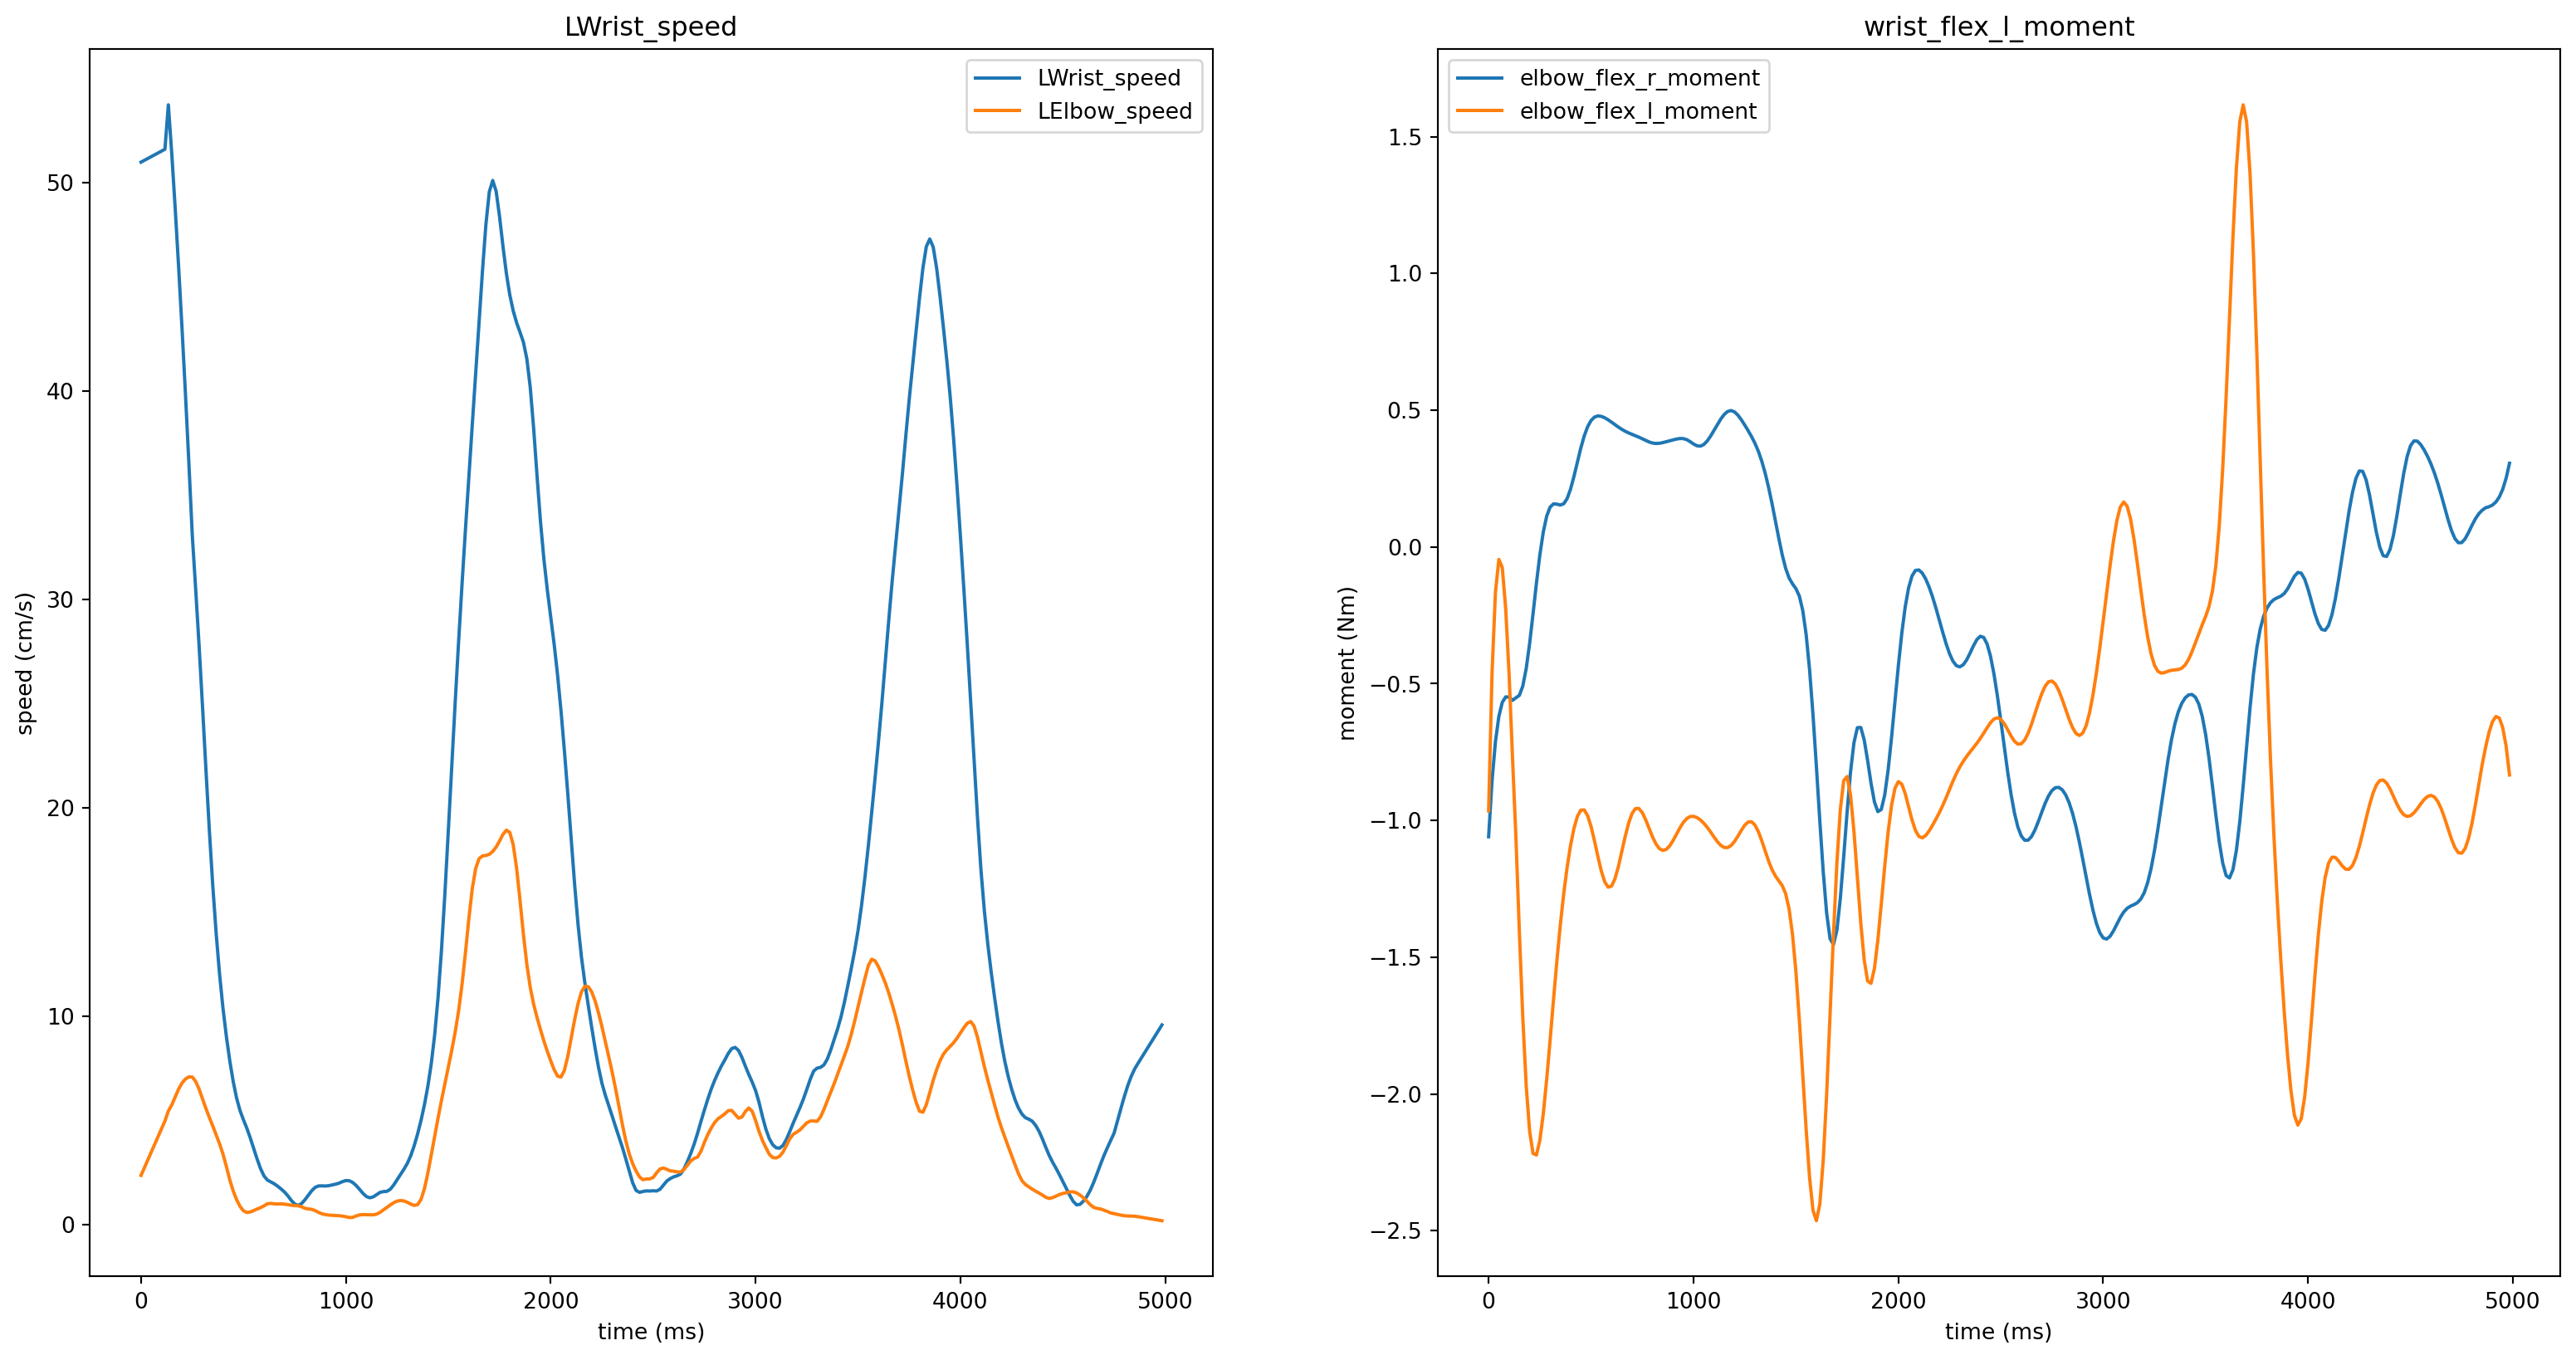

In [10]:
#| code-fold: true
#| code-summary: Show code for the plot

# load in one id and mt file with the same trialid
idfiles = glob.glob(MTfolder_processed + '/id*.csv')
mtfiles = glob.glob(MTfolder_processed + '/mt*.csv')

id = pd.read_csv(idfiles[0])
print(idfiles[0])
mt = pd.read_csv(mtfiles[0])
print(mtfiles[0])

# plot
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(mt['Time'], mt['LWrist_speed'], label='LWrist_speed')
# add LElbow_speed
ax[0].plot(mt['Time'], mt['LElbow_speed'], label='LElbow_speed')
ax[0].set_title('LWrist_speed')
ax[0].set_ylabel('speed (cm/s)')
ax[0].set_xlabel('time (ms)')
ax[0].legend()

# elbow flexion
ax[1].plot(id['time'], id['elbow_flex_r_moment'], label='elbow_flex_r_moment')
ax[1].plot(id['time'], id['elbow_flex_l_moment'], label='elbow_flex_l_moment')
ax[1].set_title('wrist_flex_l_moment')
ax[1].set_ylabel('moment (Nm)')
ax[1].set_xlabel('time (ms)')
ax[1].legend()

plt.show()

## Balance Board


We do XXX


In [11]:
#| code-fold: true
#| code-summary: Code to process balance board data

BB_files = glob.glob(BBfolder + '*BalanceBoard*.csv', recursive=True)

for bb in BB_files:
    print('working on ' + bb)
    # get trialid
    trialid = bb.split('\\')[-1].split('.')[0]
    # get the first, second, fourth, nineth elements
    trialid = '_'.join(trialid.split('_')[:2] + trialid.split('_')[3:4] + trialid.split('_')[8:9])

    # because we are going to merge on bb, we will store also more information
    fileinfo = bb.split('\\')[-1].split('.')[0]

    # if second element is 1, we will store last three elements
    if fileinfo.split('_')[1] == '1':
        # if there is not 'corrected' in the name, we will store last three elements
        if 'corrected' not in fileinfo:
            info = '_'.join(fileinfo.split('_')[-3:])
        else:
            info = '_'.join(fileinfo.split('_')[-4:])
    elif fileinfo.split('_')[1] == '2':
        # otherwise we store last four elements (5 when corrected)
        if 'corrected' not in fileinfo:
            info = '_'.join(fileinfo.split('_')[-4:])
        else:
            info = '_'.join(fileinfo.split('_')[-5:])

    # Load the balanceboard data
    df_bb = pd.read_csv(bb)

    # Rename columns
    df_bb.columns = ['time_s', 'left_back', 'right_forward', 'right_back', 'left_forward']

    # Calculate sampling rate
    bbsamp = 1 / np.mean(np.diff(df_bb['time_s'] - min(df_bb['time_s'])))

    # Apply Savitzky-Golay filter to smooth the data
    for col in df_bb.columns[1:]:
        df_bb[col] = scipy.signal.savgol_filter(df_bb[col], 51, 5)

    # Calculate COPX and COPY
    COPX = (df_bb['right_forward'] + df_bb['right_back']) - (df_bb['left_forward'] + df_bb['left_back'])
    COPY = (df_bb['right_forward'] + df_bb['left_forward']) - (df_bb['left_back'] + df_bb['right_back'])

    # Calculate COPXc and COPYc
    df_bb['COPXc'] = scipy.signal.savgol_filter(np.insert(np.diff(COPX), 0, 0), 51, 5)
    df_bb['COPYc'] = scipy.signal.savgol_filter(np.insert(np.diff(COPY), 0, 0), 51, 5)

    # Calculate COPc
    df_bb['COPc'] = np.sqrt(df_bb['COPXc']**2 + df_bb['COPYc']**2)

    # restart the time so that starts from 0
    df_bb['time_s'] = df_bb['time_s'] - min(df_bb['time_s'])
    # convert to ms
    df_bb['time_s'] = df_bb['time_s']*1000

    # rename time_s to time
    df_bb.rename(columns={'time_s': 'time'}, inplace=True)

    # Add trialid
    df_bb['TrialID'] = trialid
    # Add info
    df_bb['FileInfo'] = info

    # Write as csv to MTfolder_processed
    df_bb.to_csv(MTfolder_processed + '/bb_' + trialid + '.csv', index=False)

df_bb.head(15)

working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_111_BalanceBoard_stream_nominal_srate500_p1_ziek_geluiden_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_112_BalanceBoard_stream_nominal_srate500_p1_ziek_geluiden_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_0_BalanceBoard_stream_nominal_srate500_p0_bloem_geluiden.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_3_BalanceBoard_stream_nominal_srate500_p0_vechten_geluiden.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_4_BalanceBoard_stream_nominal_srate500_p0_ademen_geluiden.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_5_BalanceBoard_stream_nominal_srate500_p0_bijten_geluiden.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_6_BalanceBoard_stream_nominal_srate500_p0_zoemen_geluiden.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_7_BalanceBoard_stream_nominal_srate500_p0_fluisteren_geluiden.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_11_BalanceBoard_stream_nominal_srate500_p1_eten_geluiden.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_pr

working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_14_BalanceBoard_stream_nominal_srate500_p1_snel_geluiden.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_15_BalanceBoard_stream_nominal_srate500_p1_regen_geluiden.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_16_BalanceBoard_stream_nominal_srate500_p1_boos_geluiden.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_17_BalanceBoard_stream_nominal_srate500_p1_luidruchtig_geluiden.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_19_BalanceBoard_stream_nominal_srate500_p0_olifant_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_20_BalanceBoard_stream_nominal_srate500_p0_verdrietig_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_21_BalanceBoard_stream_nominal_srate500_p0_koud_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_22_BalanceBoard_stream_nominal_srate500_p0_staan_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_23_BalanceBoard_stream_nominal_srate500_p0_stil_combinatie.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_24_BalanceBoard_stream_nominal_srate500_p0_lopen_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_25_BalanceBoard_stream_nominal_srate500_p0_bang_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_26_BalanceBoard_stream_nominal_srate500_p0_gooien_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_27_BalanceBoard_stream_nominal_srate500_p1_haasten_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_28_BalanceBoard_stream_nominal_srate500_p1_gek_combinatie.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_29_BalanceBoard_stream_nominal_srate500_p1_rennen_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_30_BalanceBoard_stream_nominal_srate500_p1_likken_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_31_BalanceBoard_stream_nominal_srate500_p1_klein_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_32_BalanceBoard_stream_nominal_srate500_p1_onweer_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_33_BalanceBoard_stream_nominal_srate500_p1_man_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\0

working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_35_BalanceBoard_stream_nominal_srate500_p1_langzaam_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_36_BalanceBoard_stream_nominal_srate500_p0_snijden_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_37_BalanceBoard_stream_nominal_srate500_p0_comfortabel_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_38_BalanceBoard_stream_nominal_srate500_p0_kind_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_39_BalanceBoard_stream_nominal_srate500_p0_hoorn_gebaren.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_40_BalanceBoard_stream_nominal_srate500_p0_kotsen_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_41_BalanceBoard_stream_nominal_srate500_p0_dood_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_42_BalanceBoard_stream_nominal_srate500_p0_drinken_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_43_BalanceBoard_stream_nominal_srate500_p0_sterk_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_44_BalanceBoard_stream_nominal_srate500_p0_oud_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing

working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_46_BalanceBoard_stream_nominal_srate500_p1_slang_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_47_BalanceBoard_stream_nominal_srate500_p1_slang_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_48_BalanceBoard_stream_nominal_srate500_p1_zuur_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_49_BalanceBoard_stream_nominal_srate500_p1_niet_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_50_BalanceBoard_stream_nominal_srate500_p1_weten_gebaren.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_51_BalanceBoard_stream_nominal_srate500_p1_slaan_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_52_BalanceBoard_stream_nominal_srate500_p1_hond_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_53_BalanceBoard_stream_nominal_srate500_p1_vangen_gebaren.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_0_BalanceBoard_stream_nominal_srate500_p0_juichen_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_1_BalanceBoard_stream_nominal_srate500_p0_zingen_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_pro

working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_3_BalanceBoard_stream_nominal_srate500_p0_vrouw_combinatie_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_4_BalanceBoard_stream_nominal_srate500_p0_vrouw_combinatie_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_5_BalanceBoard_stream_nominal_srate500_p0_verbranden_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_6_BalanceBoard_stream_nominal_srate500_p0_verbranden_combinatie_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_7_BalanceBoard_stream_nominal_srate500_p0_verbranden_combinatie_c2.csv
working on E:\FLESH_ContinuousBodilyEffo

working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_9_BalanceBoard_stream_nominal_srate500_p0_kauwen_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_10_BalanceBoard_stream_nominal_srate500_p0_vliegen_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_11_BalanceBoard_stream_nominal_srate500_p0_vliegen_combinatie_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_12_BalanceBoard_stream_nominal_srate500_p0_vliegen_combinatie_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_13_BalanceBoard_stream_nominal_srate500_p0_misschien_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffo

working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_15_BalanceBoard_stream_nominal_srate500_p0_misschien_combinatie_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_16_BalanceBoard_stream_nominal_srate500_p0_bliksem_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_17_BalanceBoard_stream_nominal_srate500_p0_bliksem_combinatie_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_18_BalanceBoard_stream_nominal_srate500_p0_bliksem_combinatie_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_19_BalanceBoard_stream_nominal_srate500_p1_glimlach_combinatie_c0.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_20_BalanceBoard_stream_nominal_srate500_p1_glimlach_combinatie_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_21_BalanceBoard_stream_nominal_srate500_p1_glimlach_combinatie_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_22_BalanceBoard_stream_nominal_srate500_p1_klok_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_23_BalanceBoard_stream_nominal_srate500_p1_groot_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_24_BalanceBoard_stream_nominal_srate500_p1_groot_combinatie_c1.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_25_BalanceBoard_stream_nominal_srate500_p1_groot_combinatie_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_26_BalanceBoard_stream_nominal_srate500_p1_hoog_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_27_BalanceBoard_stream_nominal_srate500_p1_hoog_combinatie_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_28_BalanceBoard_stream_nominal_srate500_p1_hoog_combinatie_c2.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_29_BalanceBoard_stream_nominal_srate500_p1_blij_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_30_BalanceBoard_stream_nominal_srate500_p1_blij_combinatie_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_31_BalanceBoard_stream_nominal_srate500_p1_blij_combinatie_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_32_BalanceBoard_stream_nominal_srate500_p1_vis_combinatie_c0.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_33_BalanceBoard_stream_nominal_srate500_p1_ruiken_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_34_BalanceBoard_stream_nominal_srate500_p1_wind_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_35_BalanceBoard_stream_nominal_srate500_p1_heet_combinatie_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_36_BalanceBoard_stream_nominal_srate500_p1_heet_combinatie_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_37_BalanceBoard_stream_nominal_srate500_p1_heet_combinatie_c2.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_38_BalanceBoard_stream_nominal_srate500_p0_fiets_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_39_BalanceBoard_stream_nominal_srate500_p0_vliegtuig_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_40_BalanceBoard_stream_nominal_srate500_p0_vliegtuig_gebaren_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_41_BalanceBoard_stream_nominal_srate500_p0_vogel_gebaren_c0.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_42_BalanceBoard_stream_nominal_srate500_p0_kruipen_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_43_BalanceBoard_stream_nominal_srate500_p0_water_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_44_BalanceBoard_stream_nominal_srate500_p0_water_gebaren_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_45_BalanceBoard_stream_nominal_srate500_p0_water_gebaren_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_46_BalanceBoard_stream_nominal_srate500_p0_vuur_gebaren_c0.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_47_BalanceBoard_stream_nominal_srate500_p0_goed_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_48_BalanceBoard_stream_nominal_srate500_p0_goed_gebaren_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_49_BalanceBoard_stream_nominal_srate500_p0_horen_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_50_BalanceBoard_stream_nominal_srate500_p0_ver_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_51_BalanceBoard_stream_nominal_srate500_p0_ver_gebaren_c1.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_52_BalanceBoard_stream_nominal_srate500_p0_ver_gebaren_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_53_BalanceBoard_stream_nominal_srate500_p1_geheim_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_54_BalanceBoard_stream_nominal_srate500_p1_geheim_gebaren_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_55_BalanceBoard_stream_nominal_srate500_p1_geheim_gebaren_c2.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_56_BalanceBoard_stream_nominal_srate500_p1_telefoon_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_57_BalanceBoard_stream_nominal_srate500_p1_blazen_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_58_BalanceBoard_stream_nominal_srate500_p1_geven_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_59_BalanceBoard_stream_nominal_srate500_p1_geven_gebaren_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_60_BalanceBoard_stream_nominal_srate500_p1_kat_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_

working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_62_BalanceBoard_stream_nominal_srate500_p1_zoet_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_63_BalanceBoard_stream_nominal_srate500_p1_zoet_gebaren_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_64_BalanceBoard_stream_nominal_srate500_p1_zoet_gebaren_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_65_BalanceBoard_stream_nominal_srate500_p1_slapen_gebaren_c0.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_66_BalanceBoard_stream_nominal_srate500_p1_berg_gebaren_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_67_BalanceBoard_stream_nominal_srate500_p0_ziek_geluiden_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_68_BalanceBoard_stream_nominal_srate500_p0_ziek_geluiden_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_69_BalanceBoard_stream_nominal_srate500_p0_ziek_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_70_BalanceBoard_stream_nominal_srate500_p0_zwaaien_geluiden_c0.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_71_BalanceBoard_stream_nominal_srate500_p0_zwaaien_geluiden_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_72_BalanceBoard_stream_nominal_srate500_p0_zwaaien_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_73_BalanceBoard_stream_nominal_srate500_p0_geur_geluiden_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_74_BalanceBoard_stream_nominal_srate500_p0_geur_geluiden_c1.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_75_BalanceBoard_stream_nominal_srate500_p0_geur_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_76_BalanceBoard_stream_nominal_srate500_p0_vlieg_geluiden_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_77_BalanceBoard_stream_nominal_srate500_p0_vlieg_geluiden_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_78_BalanceBoard_stream_nominal_srate500_p0_vlieg_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_79_BalanceBoard_stream_nominal_srate500_p0_scherp_geluiden_c0.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_80_BalanceBoard_stream_nominal_srate500_p0_scherp_geluiden_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_81_BalanceBoard_stream_nominal_srate500_p0_scherp_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_82_BalanceBoard_stream_nominal_srate500_p0_staart_geluiden_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_83_BalanceBoard_stream_nominal_srate500_p0_staart_geluiden_c1.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_84_BalanceBoard_stream_nominal_srate500_p0_staart_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_85_BalanceBoard_stream_nominal_srate500_p0_vallen_geluiden_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_86_BalanceBoard_stream_nominal_srate500_p0_piepen_geluiden_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_87_BalanceBoard_stream_nominal_srate500_p0_piepen_geluiden_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_88_BalanceBoard_stream_nominal_srate500_p0_piepen_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_proces

working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_90_BalanceBoard_stream_nominal_srate500_p0_jagen_geluiden_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_91_BalanceBoard_stream_nominal_srate500_p0_jagen_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_92_BalanceBoard_stream_nominal_srate500_p1_bal_geluiden_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_93_BalanceBoard_stream_nominal_srate500_p1_bal_geluiden_c1.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_94_BalanceBoard_stream_nominal_srate500_p1_bal_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_95_BalanceBoard_stream_nominal_srate500_p1_sneeuw_geluiden_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_96_BalanceBoard_stream_nominal_srate500_p1_sneeuw_geluiden_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_pr_97_BalanceBoard_stream_nominal_srate500_p1_sneeuw_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_98_BalanceBoard_stream_nominal_srate500_p1_zwaar_geluiden_c0.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_99_BalanceBoard_stream_nominal_srate500_p1_zwaar_geluiden_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_100_BalanceBoard_stream_nominal_srate500_p1_zwaar_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_101_BalanceBoard_stream_nominal_srate500_p1_grommen_geluiden_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_102_BalanceBoard_stream_nominal_srate500_p1_zout_geluiden_c0.csv


working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_103_BalanceBoard_stream_nominal_srate500_p1_zout_geluiden_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_104_BalanceBoard_stream_nominal_srate500_p1_zout_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_105_BalanceBoard_stream_nominal_srate500_p1_zuigen_geluiden_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_106_BalanceBoard_stream_nominal_srate500_p1_zuigen_geluiden_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_107_BalanceBoard_stream_nominal_srate500_p1_zuigen_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_proce

working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_109_BalanceBoard_stream_nominal_srate500_p1_dik_geluiden_c1.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_110_BalanceBoard_stream_nominal_srate500_p1_dik_geluiden_c2.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_2_trial_113_BalanceBoard_stream_nominal_srate500_p1_huilen_geluiden_c0.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_1_BalanceBoard_stream_nominal_srate500_p0_dansen_geluiden.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_2_BalanceBoard_stream_nominal_srate500_p0_bitter_geluiden.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF

working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_18_BalanceBoard_stream_nominal_srate500_p0_snel_combinatie.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_1_BalanceBoard_stream_nominal_srate500_p0_dansen_geluiden_corrected.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_9_BalanceBoard_stream_nominal_srate500_p1_langzaam_geluiden_corrected.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_10_BalanceBoard_stream_nominal_srate500_p1_auto_geluiden_corrected.csv
working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_pr_18_BalanceBoard_stream_nominal_srate500_p0_snel_combinatie_corrected.csv
working on E:\FLESH_ContinuousBodilyEffort\03_T

working on E:\FLESH_ContinuousBodilyEffort\03_TS_processing\..\01_XDF_processing\data\Data_processed\Data_trials\0_1_trial_8_BalanceBoard_stream_nominal_srate500_p0_walgen_geluiden_corrected.csv


,time,left_back,right_forward,right_back,left_forward,COPXc,COPYc,COPc,TrialID,FileInfo
0,0.000000,1.125796,0.801558,1.557701,1.314984,0.000106,0.000139,0.000175,0_1_8_p0,p0_walgen_geluiden_corrected
1,2.000052,1.125025,0.801057,1.557214,1.314493,0.000165,0.000157,0.000228,0_1_8_p0,p0_walgen_geluiden_corrected
2,4.000105,1.124373,0.800649,1.556812,1.314079,0.000202,0.000164,0.000260,0_1_8_p0,p0_walgen_geluiden_corrected
3,6.000157,1.123830,0.800325,1.556490,1.313736,0.000220,0.000163,0.000274,0_1_8_p0,p0_walgen_geluiden_corrected
4,8.000209,1.123389,0.800075,1.556241,1.313461,0.000225,0.000154,0.000272,0_1_8_p0,p0_walgen_geluiden_corrected
5,10.000262,1.123042,0.799893,1.556060,1.313248,0.000217,0.000139,0.000258,0_1_8_p0,p0_walgen_geluiden_corrected
6,12.000314,1.122782,0.799771,1.555942,1.313093,0.000201,0.000118,0.000234,0_1_8_p0,p0_walgen_geluiden_corrected
7,14.000366,1.122602,0.799703,1.555880,1.312992,0.000179,0.000094,0.000202,0_1_8_p0,p0_walgen_geluiden_corrected
8,16.000418,1.122494,0.799681,1.555870,1.312941,0.000153,0.000067,0.000167,0_1_8_p0,p0_walgen_geluiden_corrected
9,18.000471,1.122453,0.799700,1.555908,1.312934,0.000124,0.000038,0.000130,0_1_8_p0,p0_walgen_geluiden_corrected


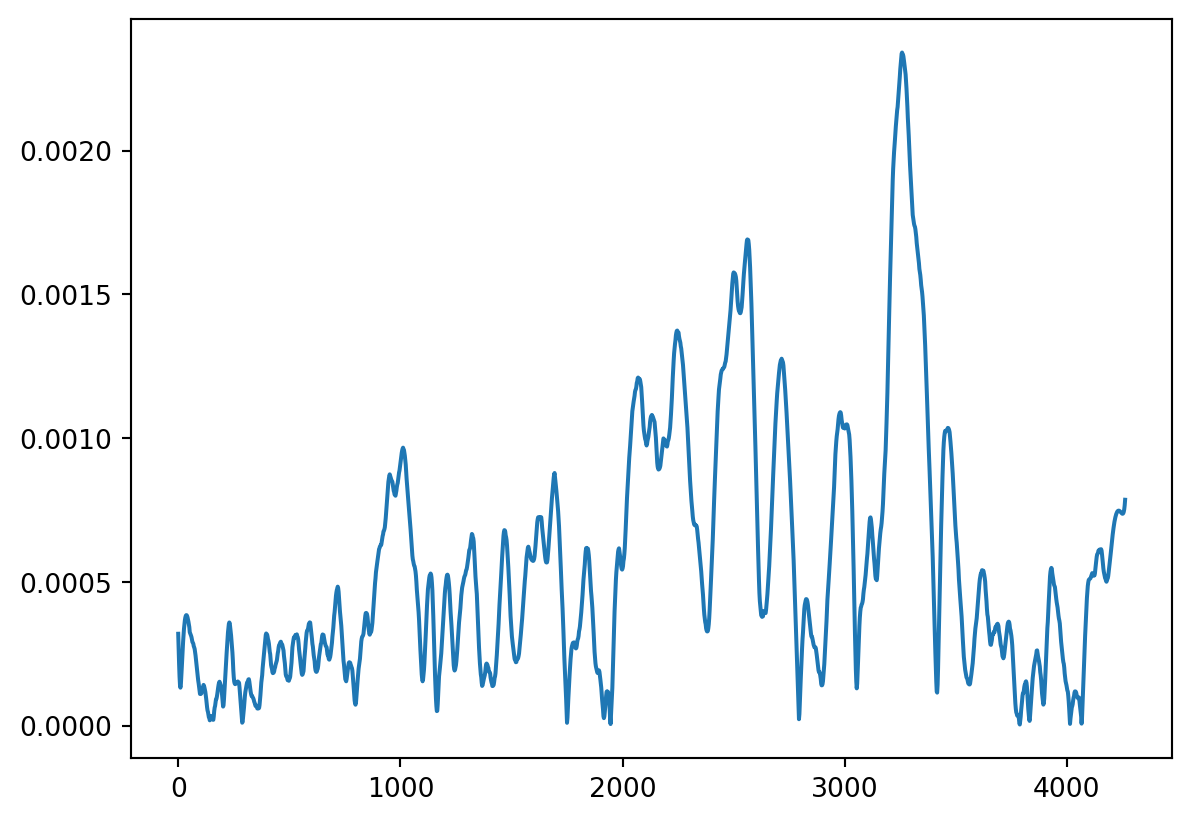

In [12]:
#| code-fold: true
#| code-summary: Show code for the plot

bbfiles = glob.glob(MTfolder_processed + '/bb*.csv')
samplebb = pd.read_csv(bbfiles[20])

# plot COPc the sample
plt.plot(samplebb['time'], samplebb['COPc'])
#plt.xlim(1000,2000)
plt.show()